# TreeStruct

TreeStruct is a Python module which simplifies the task of creating, traversing, manipulating and visualizing tree structures.

Let's start by importing key objects from `treestruct`:

In [1]:
from treestruct import Node, visualize, FORWARD, BACKWARD

## Basics

Let's create our first tree struct using the **Node** object:

In [2]:
a = Node('a', children=[
    Node('b', children=[
        Node('d', children=[
            Node('h')
        ]),
        Node('e', children=[
            Node('i'),
            Node('j')
        ])
    ]),
    Node('c', children=[
        Node('f', children=[
            Node('k')
        ]),
        Node('g')
    ])
])

**Node** accepts a `data` attribute. This can be any arbitrary object.

In [3]:
a.data

'a'

We can traverse the tree structure via `depth_first_traversal` and `breadth_first_traversal`:

In [4]:
def callback(node, obj):
    if node.data in ('e', 'f'):
        print 'Found node of interest', node
        obj.append(node)
    else:
        print 'Ignoring node', node

result = a.depth_first_traversal(callback=callback, direction=FORWARD, obj=[])
result

Ignoring node <Node a>
Ignoring node <Node c>
Found node of interest <Node f>
Ignoring node <Node k>
Ignoring node <Node g>
Ignoring node <Node b>
Found node of interest <Node e>
Ignoring node <Node i>
Ignoring node <Node j>
Ignoring node <Node d>
Ignoring node <Node h>


[<Node f>, <Node e>]

We can search for nodes via `.find` and `.find_all`:

In [5]:
e = a.find(condition=lambda n: n.data == 'e')
e

<Node e>

We can access the children of the node via the `children` attribute, and the parents via the `parents` attribute:

In [6]:
e.children

NodeSet(<Node j>, <Node i>)

In [7]:
e.parents

NodeSet(<Node b>,)

If we expect the parent to always have a single parent, we can call `e.parent.one()` to return it directly:

In [8]:
e.parents.one()

<Node b>

## Visualization

We can visualize graphs via the `visualize` module. This module is a basic wrapper around the `graphviz` module. The `Graph` class gives more control on how to construct the graph outputs, but for now we will the `view_inline` function, which returns a Jupyter Notebook compatible graph:

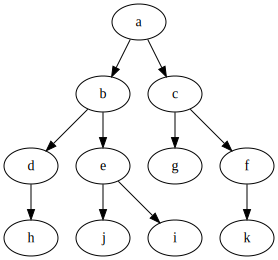

In [9]:
visualize.view_inline(a)

Only the subtree of the given node is visualized:

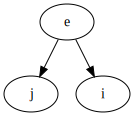

In [10]:
visualize.view_inline(e)

## Paths

We can extract a path from our tree structure via flattening and re-building:

In [11]:
flattened_lists = e.flatten()
flattened_lists

[[<Node a>, <Node b>, <Node e>, <Node j>],
 [<Node a>, <Node b>, <Node e>, <Node i>]]

In [12]:
paths = [Node.from_nodes(l) for l in flattened_lists]
graphs = [visualize.view_inline(p) for p in paths]
graphs

[<graphviz.dot.Digraph at 0x106865d50>, <graphviz.dot.Digraph at 0x1068690d0>]

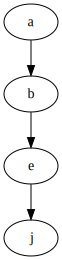

In [13]:
graphs[0]

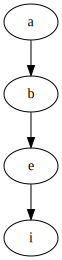

In [14]:
graphs[1]

## Manipulation

Nodes can be deleted from trees by via `delete`. By default the node and all its children are deleted from the graph, though by providing `FORWARD` as a direction, we only delete the children from the tree:

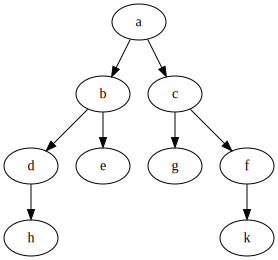

In [15]:
e.delete(direction=FORWARD)
visualize.view_inline(a)

Nodes can also be added as follows:

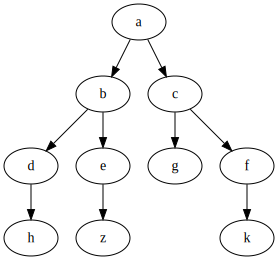

In [16]:
e.children.add(Node('z'))
visualize.view_inline(a)

## Exporting and importing

We can convert a node structure to a Python dictionary via `.to_dict`. If you're required to transform the node's data object, you can pass in a function via the `data_converter` parameter which will be called for each data object.

In [17]:
a_dict = a.to_dict(data_converter=str)[0]
a_dict

{'children': [{'children': [{'children': [{'children': [], 'data': 'h'}],
     'data': 'd'},
    {'children': [{'children': [], 'data': 'z'}], 'data': 'e'}],
   'data': 'b'},
  {'children': [{'children': [], 'data': 'g'},
    {'children': [{'children': [], 'data': 'k'}], 'data': 'f'}],
   'data': 'c'}],
 'data': 'a'}

You can also convert a Python dictionary back into a node structure using `.from_dict`:

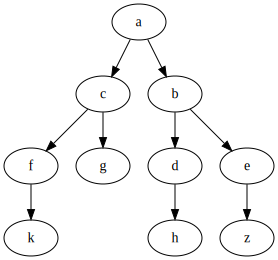

In [18]:
new_a = Node.from_dict(a_dict, data_converter=str)
visualize.view_inline(new_a)

Do note that the order of children is not being maintained at the moment.